# 投手防禦率上升的原因？

我們從2018年投手的防禦率圖表可以發現羅力(投手)在面對統一打者的防禦率最高。但是單一方面從防禦率看不出甚麼內容，因此我們要用更加細節的數據去做分析。

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

在CPBL官方網站上取得羅力面對統一打者的數據。

PLAYER:球員姓名。BAT:左/右打。AB:打數。H:安打。HR:全壘打。BB:四壞球。IBB:故意四壞。HBP:觸身球。SO:三振。AVG:打擊率。

In [52]:
#抓取2018年羅力對統一打者數據(並且作整理)
Loree_url = 'http://www.cpbl.com.tw/pitcher/pbscore.html?&game_type=01&game_id=238&game_date=2018-09-29&pbyear=2018&type=&sgameno='
Loree_2018U = pd.read_html(Loree_url)[0]
#list.loc[(list['PLAYER'] == '陳傑憲')]
Loree_2018U.columns = ['PLAYER', 'BATS', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']
Loree_2018U.drop(Loree_2018U.index[[0]],inplace=True)
Loree_2018U = Loree_2018U.reset_index(drop=True)
Loree_2018U

,PLAYER,BATS,AB,H,HR,BB,IBB,HBP,SO,AVG
0,潘彥廷,L,2,0,0,0,0,0,0,0.000
1,陳傑憲,L,22,6,0,2,0,0,3,0.273
2,蘇智傑,L,20,6,2,1,0,0,9,0.300
3,唐肇廷,L,20,7,0,0,0,0,5,0.350
4,潘武雄,L,16,6,2,0,0,0,3,0.375
5,郭峻偉,R,1,0,0,1,0,0,0,0.000
6,高國慶,R,13,0,0,0,0,0,4,0.000
7,陳鏞基,R,22,5,2,1,1,0,9,0.227
8,鄭鎧文,R,4,1,0,0,0,0,2,0.250
9,陳重羽,R,12,3,0,0,0,0,3,0.250


In [53]:
#抓取2017年羅力對統一打者數據(並且作整理)
Loree_2017U = pd.read_html(Loree_url)[1]
#list.loc[(list['PLAYER'] == '陳傑憲')]
Loree_2017U.columns = ['PLAYER', 'BATS', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']
Loree_2017U.drop(Loree_2017U.index[[0]],inplace=True)
Loree_2017U = Loree_2017U.reindex(index=[1,4,3,2,5,8,13,11,6,7,10,12])
Loree_2017U = Loree_2017U.reset_index(drop=True)
Loree_2017U

,PLAYER,BATS,AB,H,HR,BB,IBB,HBP,SO,AVG
0,潘彥廷,L,7,0,0,2,0,0,4,0.000
1,陳傑憲,L,34,12,0,0,0,0,1,0.353
2,蘇智傑,L,24,6,0,2,0,0,7,0.250
3,唐肇廷,L,20,3,0,0,0,0,7,0.150
4,潘武雄,L,12,5,1,4,0,0,2,0.417
5,郭峻偉,R,10,1,0,0,0,0,2,0.100
6,高國慶,R,26,9,1,2,0,0,5,0.346
7,陳鏞基,R,24,4,0,1,0,0,5,0.167
8,鄭鎧文,R,9,0,0,0,0,0,3,0.000
9,陳重羽,R,4,0,0,0,0,0,3,0.000


In [54]:
#轉換型態為float(原本都是object)
Loree_2018U[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']] = Loree_2018U[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']].astype(float)
Loree_2017U[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']] = Loree_2017U[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']].astype(float)
    
Loree_2018U.dtypes

PLAYER     object
BATS       object
AB        float64
H         float64
HR        float64
BB        float64
IBB       float64
HBP       float64
SO        float64
AVG       float64
dtype: object

In [55]:
#取出打擊率部分製表
Loree_2018U_AVG = Loree_2018U[['PLAYER','AVG']].copy()
Loree_2017U_AVG = Loree_2017U[['PLAYER','AVG']].copy()
Loree_2018U_AVG.rename(columns={"AVG": "AVG_2018"}, inplace = True)
Loree_2017U_AVG.rename(columns={"AVG": "AVG_2017"}, inplace = True)
Loree_U_AVG = pd.merge(Loree_2018U_AVG, Loree_2017U_AVG, how='inner')
#Loree_2018U_AVG
Loree_U_AVG

,PLAYER,AVG_2018,AVG_2017
0,潘彥廷,0.000,0.000
1,陳傑憲,0.273,0.353
2,蘇智傑,0.300,0.250
3,唐肇廷,0.350,0.150
4,潘武雄,0.375,0.417
5,郭峻偉,0.000,0.100
6,高國慶,0.000,0.346
7,陳鏞基,0.227,0.167
8,鄭鎧文,0.250,0.000
9,陳重羽,0.250,0.000


橘色為統一獅球員2018年球季對羅力的打擊率，灰色則為2017年的。

從圖可觀察到大部分統一獅的打者的打擊率有進步，事實上，在2017年整隊面對羅力的打擊率只有0.190，而今年來到0.270，是相當巨大的差距。

這似乎也反映到防禦率上，2017年羅力對獅隊的防禦率為1.68，但2018上升到3.95。但是我個人認為打擊率上升並不是防禦率上升的最最最大原因，因為桃猿在2018球季對羅力的打擊率更為出色(0.293)，但羅力面對桃猿的防禦率(3.52)卻低於統一獅。因此我認為有更為關鍵的原因，導致羅力的防禦率上升。

Text(0,0.5,'AVG')

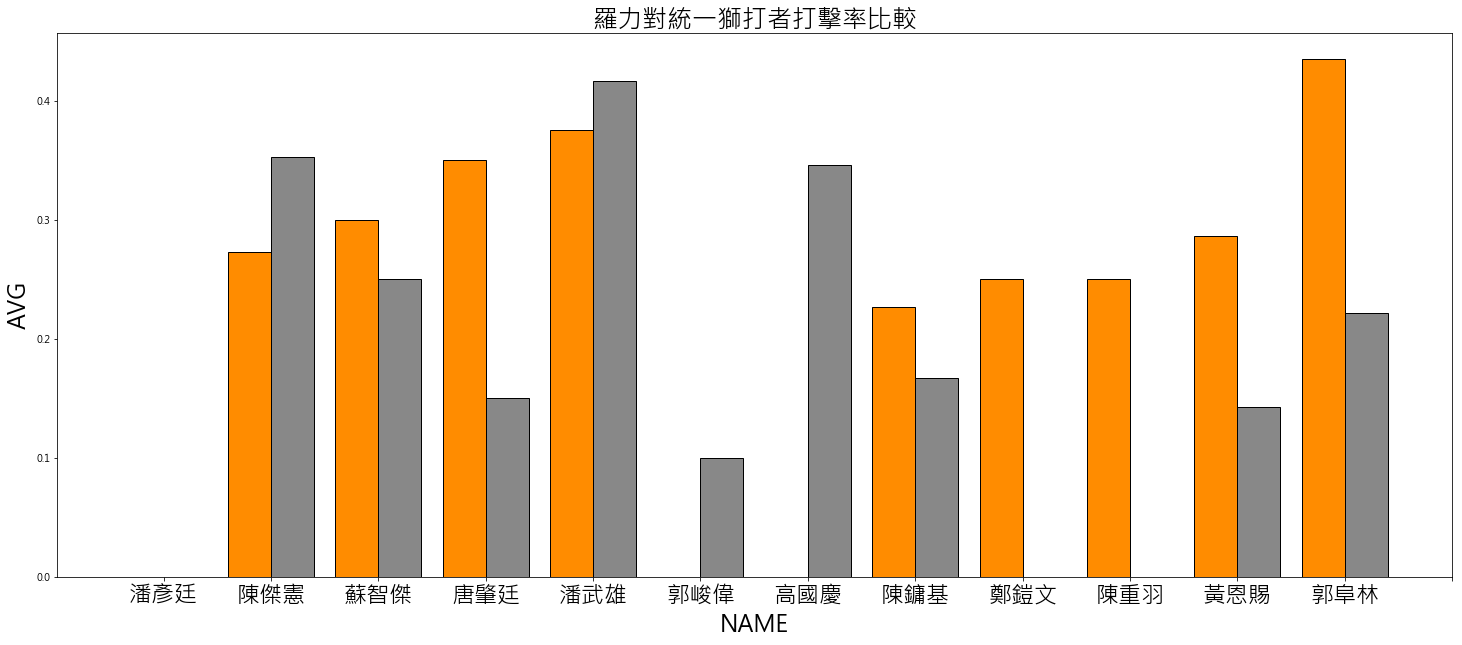

In [56]:
#將表繪成圖
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)

for (i, row) in Loree_U_AVG.iterrows():
    plt.bar([i-0.2, i+0.2], [row['AVG_2018'], row['AVG_2017']],
             color=['#FF8C00', '#888888'], width=0.4, align='center', edgecolor='#000000')
'''   
for (i, row) in Loree_U_AVG.iterrows():
    plt.bar([i], [-row['AVG_2017']],
             color=['#888888'], width=0.4, align='center', edgecolor='#000000', label='2017')
''' 
plt.xticks(range(0, 13), Loree_U_AVG['PLAYER'], fontsize=23)

#plt.legend()
plt.title("羅力對統一獅打者打擊率比較", fontsize=25)
plt.xlabel('NAME', fontsize=23)
plt.ylabel('AVG', fontsize=23)

沒錯，就是全壘打。

在棒球場上，全壘打是得分最直接的方式，對投手來說也是殺傷力最大的。2018年球季羅力被打了15支全壘打，球中有10支是獅隊球員打的。因為全壘打多，安打數較桃猿(73)少的獅隊(68)，打點卻多出了6分，可見全壘打的得分效率真的大。

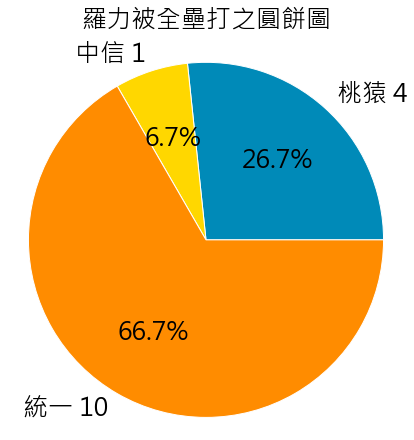

In [57]:
fig = plt.figure(figsize=(7,7))
labels = '桃猿 4', '中信 1', '統一 10'
sizes = [4, 1, 10]
colors = ['#008AB8', '#FFD700', '#FF8C00']

plt.pie(sizes,labels=labels, autopct='%1.1f%%', colors = colors, wedgeprops=dict(edgecolor='#FFFFFF'),
        textprops = {'fontsize':25})
plt.text(-0.7,1.2,"羅力被全壘打之圓餅圖", fontsize=25)
plt.axis('equal') 
#plt.title("羅力被全壘打之圓餅圖", fontsize=25)
plt.show()

In [58]:
Loree_2018U_Th = Loree_2018U[['PLAYER', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP']].copy()
Loree_2018U_Th

,PLAYER,AB,H,HR,BB,IBB,HBP
0,潘彥廷,2.0,0.0,0.0,0.0,0.0,0.0
1,陳傑憲,22.0,6.0,0.0,2.0,0.0,0.0
2,蘇智傑,20.0,6.0,2.0,1.0,0.0,0.0
3,唐肇廷,20.0,7.0,0.0,0.0,0.0,0.0
4,潘武雄,16.0,6.0,2.0,0.0,0.0,0.0
5,郭峻偉,1.0,0.0,0.0,1.0,0.0,0.0
6,高國慶,13.0,0.0,0.0,0.0,0.0,0.0
7,陳鏞基,22.0,5.0,2.0,1.0,1.0,0.0
8,鄭鎧文,4.0,1.0,0.0,0.0,0.0,0.0
9,陳重羽,12.0,3.0,0.0,0.0,0.0,0.0


因為全壘打的效益大，把它跟一壘安打算在一起似乎太浪費它的身價。因此我們決定加大全壘打的權重，重新計算一個能夠衡量打者對投手產生威脅的指標。

因為官網的數據也不是應有盡有，我們只能利用聯盟有提供的資料進行分析。

公式如下：
{(安打數-全壘打數)×3 + 全壘打×8 + 保送 + 故意四壞 + 觸身球}/{打數 + 保送 + 故意四壞 + 觸身球}

可以看到我們提高了全壘打的權重，因為打全壘打一定會得分。而其他安打的權重次高，有時一保送一安打就得分，有時候串聯三支安打還未必得分(相信我，棒球場上甚麼都有機會發生)。

之所以把其他安打的權重設為3，是因為假設安打都是一壘安打，權重假設是全壘打的四分之一。而大多數選手的一壘安打數占全體安打的二分之三，因此假設其他安打的權重為3。

In [59]:
#計算威脅指標
temp = (Loree_2018U_Th['H']-Loree_2018U_Th['HR'])*3+Loree_2018U_Th['HR']*8+Loree_2018U_Th['BB']+Loree_2018U_Th['IBB']+Loree_2018U_Th['HBP']
pmet = Loree_2018U_Th['AB'] + Loree_2018U_Th['BB']+Loree_2018U_Th['IBB']+Loree_2018U_Th['HBP']
#Loree_2018U_Th.insert(7, 'Threat', temp)
Loree_2018U_Th['Threat'] = temp/pmet
#Loree_2018U_Th.drop(columns=['Threat'],inplace=True)
Loree_2018U_Th = Loree_2018U_Th[['PLAYER','Threat']]
Loree_2018U_Th

,PLAYER,Threat
0,潘彥廷,0.000000
1,陳傑憲,0.833333
2,蘇智傑,1.380952
3,唐肇廷,1.050000
4,潘武雄,1.750000
5,郭峻偉,0.500000
6,高國慶,0.000000
7,陳鏞基,1.125000
8,鄭鎧文,0.750000
9,陳重羽,0.750000


In [60]:
Loree_2018U_De = Loree_2018U[['PLAYER', 'AB', 'H', 'BB', 'IBB', 'HBP', 'SO']].copy()
Loree_2018U_De

,PLAYER,AB,H,BB,IBB,HBP,SO
0,潘彥廷,2.0,0.0,0.0,0.0,0.0,0.0
1,陳傑憲,22.0,6.0,2.0,0.0,0.0,3.0
2,蘇智傑,20.0,6.0,1.0,0.0,0.0,9.0
3,唐肇廷,20.0,7.0,0.0,0.0,0.0,5.0
4,潘武雄,16.0,6.0,0.0,0.0,0.0,3.0
5,郭峻偉,1.0,0.0,1.0,0.0,0.0,0.0
6,高國慶,13.0,0.0,0.0,0.0,0.0,4.0
7,陳鏞基,22.0,5.0,1.0,1.0,0.0,9.0
8,鄭鎧文,4.0,1.0,0.0,0.0,0.0,2.0
9,陳重羽,12.0,3.0,0.0,0.0,0.0,3.0


有了衡量打者威脅力的公式，當然也要評估投手解決打者的能力。

跟全壘打的概念一樣，三振是投手解決打者最直接的方法，完全依靠投手本身，因此我們稍稍提高它的權重。而其他出局方式則權重不變。

公式：

{(打數-安打-三振) + 三振×3} / {打數 + 保送 + 故意四壞 + 觸身球}

In [61]:
#計算防禦指標
temp = (Loree_2018U_De['AB']-Loree_2018U_De['H']-Loree_2018U_De['SO'])+Loree_2018U_De['SO']*3
pmet = Loree_2018U_De['AB'] + Loree_2018U_De['BB']+Loree_2018U_De['IBB']+Loree_2018U_De['HBP']
#Loree_2018U_De.insert(4, 'Defense', temp)
Loree_2018U_De['Defense'] = temp/pmet
#Loree_2018U_De.drop(columns=[''Defense'],inplace=True)
Loree_2018U_De = Loree_2018U_De[['PLAYER','Defense']]

Loree_2018U_De

,PLAYER,Defense
0,潘彥廷,1.000000
1,陳傑憲,0.916667
2,蘇智傑,1.523810
3,唐肇廷,1.150000
4,潘武雄,1.000000
5,郭峻偉,0.500000
6,高國慶,1.615385
7,陳鏞基,1.458333
8,鄭鎧文,1.750000
9,陳重羽,1.250000


In [62]:
Loree_2018U_TD = pd.merge(Loree_2018U_Th, Loree_2018U_De, how='inner')
Loree_2018U_TD

,PLAYER,Threat,Defense
0,潘彥廷,0.000000,1.000000
1,陳傑憲,0.833333,0.916667
2,蘇智傑,1.380952,1.523810
3,唐肇廷,1.050000,1.150000
4,潘武雄,1.750000,1.000000
5,郭峻偉,0.500000,0.500000
6,高國慶,0.000000,1.615385
7,陳鏞基,1.125000,1.458333
8,鄭鎧文,0.750000,1.750000
9,陳重羽,0.750000,1.250000


In [63]:
Loree_2018U_TD.mean() 

Threat     0.894630
Defense    1.220722
dtype: float64

In [64]:
Loree_2017U_Th = Loree_2017U[['PLAYER', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP']].copy()
temp = (Loree_2017U_Th['H']-Loree_2017U_Th['HR'])*3+Loree_2017U_Th['HR']*8+Loree_2017U_Th['BB']+Loree_2017U_Th['IBB']+Loree_2017U_Th['HBP']
pmet = Loree_2017U_Th['AB'] + Loree_2017U_Th['BB']+Loree_2017U_Th['IBB']+Loree_2017U_Th['HBP']
#Loree_2017U_Th.insert(7, 'Threat', temp)
Loree_2017U_Th['Threat'] = temp/pmet
#Loree_2017U_Th.drop(columns=['Threat'],inplace=True)
Loree_2017U_Th = Loree_2017U_Th[['PLAYER','Threat']]

Loree_2017U_De = Loree_2017U[['PLAYER', 'AB', 'H', 'BB', 'IBB', 'HBP', 'SO']].copy()
temp = (Loree_2017U_De['AB']-Loree_2017U_De['H']-Loree_2017U_De['SO'])+Loree_2017U_De['SO']*3
pmet = Loree_2017U_De['AB']+Loree_2017U_De['BB']+Loree_2017U_De['IBB']+Loree_2017U_De['HBP']
#Loree_2017U_De.insert(4, 'Defense', temp)
Loree_2017U_De['Defense'] = temp/pmet
#Loree_2017U_De.drop(columns=[''Defense'],inplace=True)
Loree_2017U_De = Loree_2017U_De[['PLAYER','Defense']]

Loree_2017U_TD = pd.merge(Loree_2017U_Th, Loree_2017U_De, how='inner')
Loree_2017U_TD

,PLAYER,Threat,Defense
0,潘彥廷,0.222222,1.666667
1,陳傑憲,1.058824,0.705882
2,蘇智傑,0.769231,1.230769
3,唐肇廷,0.450000,1.550000
4,潘武雄,1.500000,0.687500
5,郭峻偉,0.300000,1.300000
6,高國慶,1.214286,0.964286
7,陳鏞基,0.520000,1.200000
8,鄭鎧文,0.000000,1.666667
9,陳重羽,0.000000,2.500000


In [65]:
Loree_2017U_TD.mean()['Threat']

0.6028801862625393

將獅隊打者2018年的數據與2017年畫在同一張圖上，發現防禦指標的差距不是太大，然而整體的威脅指標卻上升(橘點往右移)。這也是我認為自責分率上升的原因。

圖中的綠方點是整隊的平均值。深色的是18年的成績而淺色的是17年的成績。明顯看到18年的點比較17年的點，是往右下角移動的，也就是威脅指標上升而且防禦指標下降，這也合理解釋防禦率為什麼會上升。

Text(0,0.5,'Defense')

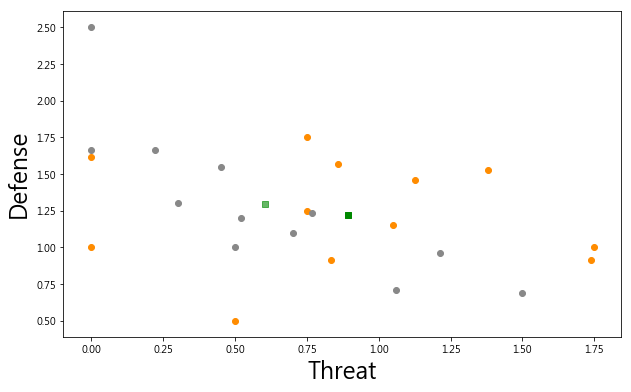

In [66]:
fig = plt.figure(figsize=(10,6))
x = Loree_2018U_TD['Threat']
y = Loree_2018U_TD['Defense']

a = Loree_2017U_TD['Threat']
b = Loree_2017U_TD['Defense']

A18_T = Loree_2018U_TD.mean()['Threat']
A18_D = Loree_2018U_TD.mean()['Defense']

A17_T = Loree_2017U_TD.mean()['Threat']
A17_D = Loree_2017U_TD.mean()['Defense']

plt.scatter(x, y, c='#FF8C00')
plt.scatter(a, b, c='#888888')
plt.scatter(A18_T, A18_D, c='#008800', marker='s')
plt.scatter(A17_T, A17_D, c='#008800', alpha=0.6, marker='s')
plt.xlabel('Threat', fontsize=23)
plt.ylabel('Defense', fontsize=23)

In [74]:
#抓取2018年羅力對桃猿、中信打者數據(並且作整理)
Loree_url2 = 'http://www.cpbl.com.tw/pitcher/pbscore.html?&game_type=01&game_id=230&game_date=2018-09-23&pbyear=2018&type=&sgameno='
Loree_2018L = pd.read_html(Loree_url2)[0]
Loree_2018L.columns = ['PLAYER', 'BATS', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']
Loree_2018L.drop(Loree_2018L.index[[0]],inplace=True)
Loree_2018L = Loree_2018L.reset_index(drop=True)

Loree_url3 = 'http://www.cpbl.com.tw/pitcher/pbscore.html?&game_type=01&game_id=207&game_date=2018-10-13&pbyear=2018&type=&sgameno='
Loree_2018B = pd.read_html(Loree_url3)[1]
Loree_2018B.columns = ['PLAYER', 'BATS', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']
Loree_2018B.drop(Loree_2018B.index[[0]],inplace=True)
Loree_2018B = Loree_2018B.reset_index(drop=True)

Loree_2018L[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']] = Loree_2018L[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']].astype(float)
Loree_2018B[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']] = Loree_2018B[['AB', 'H', 'HR', 'BB', 'IBB', 'HBP', 'SO', 'AVG']].astype(float)

#-------------------------------------------------------------------------------------#
Loree_2018L_Th = Loree_2018L[['PLAYER', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP']].copy()
temp = (Loree_2018L_Th['H']-Loree_2018L_Th['HR'])*3+Loree_2018L_Th['HR']*8+Loree_2018L_Th['BB']+Loree_2018L_Th['IBB']+Loree_2018L_Th['HBP']
pmet = Loree_2018L_Th['AB'] + Loree_2018L_Th['BB']+Loree_2018L_Th['IBB']+Loree_2018L_Th['HBP']
Loree_2018L_Th['Threat'] = temp/pmet
Loree_2018L_Th = Loree_2018L_Th[['PLAYER','Threat']]

Loree_2018L_De = Loree_2018L[['PLAYER', 'AB', 'H', 'BB', 'IBB', 'HBP', 'SO']].copy()
temp = (Loree_2018L_De['AB']-Loree_2018L_De['H']-Loree_2018L_De['SO'])+Loree_2018L_De['SO']*3
pmet = Loree_2018L_De['AB']+Loree_2018L_De['BB']+Loree_2018L_De['IBB']+Loree_2018L_De['HBP']
Loree_2018L_De['Defense'] = temp/pmet
Loree_2018L_De = Loree_2018L_De[['PLAYER','Defense']]

Loree_2018L_TD = pd.merge(Loree_2018L_Th, Loree_2018L_De, how='inner')

#-------------------------------------------------------------------------------------#
Loree_2018B_Th = Loree_2018B[['PLAYER', 'AB', 'H', 'HR', 'BB', 'IBB', 'HBP']].copy()
temp = (Loree_2018B_Th['H']-Loree_2018B_Th['HR'])*3+Loree_2018B_Th['HR']*8+Loree_2018B_Th['BB']+Loree_2018B_Th['IBB']+Loree_2018B_Th['HBP']
pmet = Loree_2018B_Th['AB'] + Loree_2018B_Th['BB']+Loree_2018B_Th['IBB']+Loree_2018B_Th['HBP']
Loree_2018B_Th['Threat'] = temp/pmet
Loree_2018B_Th = Loree_2018B_Th[['PLAYER','Threat']]

Loree_2018B_De = Loree_2018B[['PLAYER', 'AB', 'H', 'BB', 'IBB', 'HBP', 'SO']].copy()
temp = (Loree_2018B_De['AB']-Loree_2018B_De['H']-Loree_2018B_De['SO'])+Loree_2018B_De['SO']*3
pmet = Loree_2018B_De['AB']+Loree_2018B_De['BB']+Loree_2018B_De['IBB']+Loree_2018B_De['HBP']
Loree_2018B_De['Defense'] = temp/pmet
Loree_2018B_De = Loree_2018B_De[['PLAYER','Defense']]

Loree_2018B_TD = pd.merge(Loree_2018B_Th, Loree_2018B_De, how='inner')
Loree_2018L

,PLAYER,BATS,AB,H,HR,BB,IBB,HBP,SO,AVG
0,梁家榮,L,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000
1,劉時豪,L,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000
2,朱育賢,L,9.0,1.0,1.0,0.0,0.0,0.0,5.0,0.111
3,詹智堯,L,6.0,1.0,0.0,0.0,0.0,0.0,2.0,0.167
4,郭嚴文,L,19.0,4.0,0.0,0.0,0.0,0.0,4.0,0.211
5,藍寅倫,L,10.0,3.0,0.0,1.0,0.0,0.0,3.0,0.300
6,陽耀勳,L,12.0,4.0,1.0,0.0,0.0,0.0,3.0,0.333
7,王柏融,L,22.0,9.0,1.0,1.0,0.0,0.0,3.0,0.409
8,嚴宏鈞,L,6.0,4.0,0.0,0.0,0.0,0.0,1.0,0.667
9,郭永維,R,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.143


In [73]:
Loree_2018L_TD

,PLAYER,Threat,Defense
0,梁家榮,0.000000,2.333333
1,劉時豪,0.000000,2.333333
2,朱育賢,0.888889,2.000000
3,詹智堯,0.500000,1.500000
4,郭嚴文,0.631579,1.210526
5,藍寅倫,0.909091,1.181818
6,陽耀勳,1.416667,1.166667
7,王柏融,1.434783,0.826087
8,嚴宏鈞,2.000000,0.666667
9,郭永維,0.428571,0.857143


In [69]:
Loree_2018L_TD.mean()['Threat']

0.8641355010050085

將三隊的威脅指標與防禦指標畫在同一張表上，且'x'符號代表全隊平均。

咦？好像哪裡怪怪的？

中信兄弟的的威脅指標怎麼這麼高？仔細看了數據發現有一位選手的威脅指標高達3.0，原來這位打者只面對羅力兩次，而兩次都打出安打，所以才會有這麼高的值。但是這個並不合理，只面對兩次，兩次都打出安打就認定他很擅長打者位投手的球？這似乎對投手不公平。同樣的，面對兩次，兩次都沒有上壘就認定投手將打者吃得死死的？這對打者也不公平。因此我們將打數小於5的選手刪除，避免極端值輸入以影響到結果。

Text(0,0.5,'Defense')

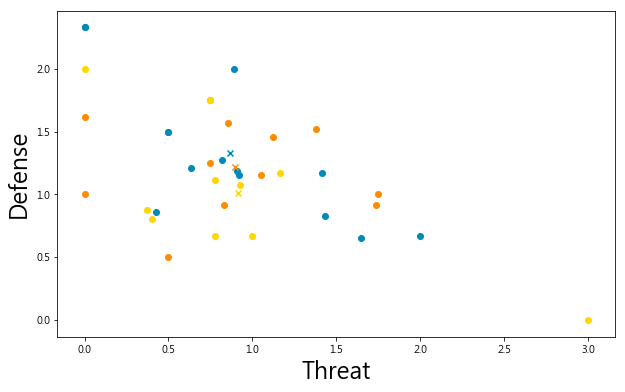

In [70]:
fig = plt.figure(figsize=(10,6))
x = Loree_2018U_TD['Threat']
y = Loree_2018U_TD['Defense']

a = Loree_2018L_TD['Threat']
b = Loree_2018L_TD['Defense']

i = Loree_2018B_TD['Threat']
j = Loree_2018B_TD['Defense']

plt.scatter(x, y, c='#FF8C00')
plt.scatter(a, b, c='#008AB8')
plt.scatter(i, j, c='#FFD700')

plt.scatter(Loree_2018U_TD.mean()['Threat'], Loree_2018U_TD.mean()['Defense'], c='#FF8C00', marker='x')
plt.scatter(Loree_2018L_TD.mean()['Threat'], Loree_2018L_TD.mean()['Defense'], c='#008AB8', marker='x')
plt.scatter(Loree_2018B_TD.mean()['Threat'], Loree_2018B_TD.mean()['Defense'], c='#FFD700', marker='x')

plt.xlabel('Threat', fontsize=23)
plt.ylabel('Defense', fontsize=23)

In [71]:
Loree_2018U_TD_NEW = Loree_2018U_TD.loc[(Loree_2018U['AB'] > 4)]
Loree_2018U_TD_NEW = Loree_2018U_TD_NEW.reset_index(drop=True)

Loree_2018L_TD_NEW = Loree_2018L_TD.loc[(Loree_2018L['AB'] > 4)]
Loree_2018L_TD_NEW = Loree_2018L_TD_NEW.reset_index(drop=True)

Loree_2018B_TD_NEW = Loree_2018B_TD.loc[(Loree_2018B['AB'] > 4)]
Loree_2018B_TD_NEW = Loree_2018B_TD_NEW.reset_index(drop=True)
Loree_2018U_TD_NEW

,PLAYER,Threat,Defense
0,陳傑憲,0.833333,0.916667
1,蘇智傑,1.380952,1.523810
2,唐肇廷,1.050000,1.150000
3,潘武雄,1.750000,1.000000
4,高國慶,0.000000,1.615385
5,陳鏞基,1.125000,1.458333
6,陳重羽,0.750000,1.250000
7,黃恩賜,0.857143,1.571429
8,郭阜林,1.739130,0.913043


將極端選手刪除後，所得到的結果就符合羅力面對三隊的防禦率。

桃猿：3.52。中信：2.30。統一：3.95。

Text(0,0.5,'Defense')

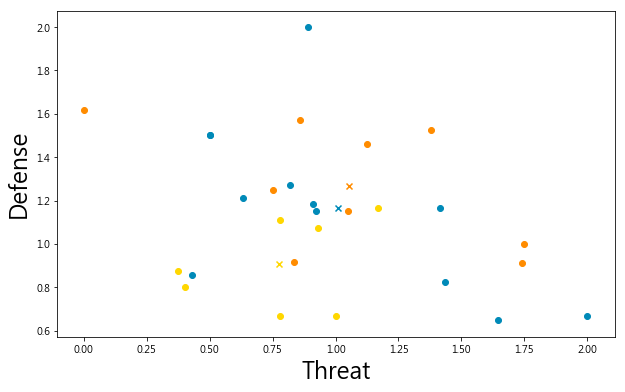

In [72]:
fig = plt.figure(figsize=(10,6))
x = Loree_2018U_TD_NEW['Threat']
y = Loree_2018U_TD_NEW['Defense']

a = Loree_2018L_TD_NEW['Threat']
b = Loree_2018L_TD_NEW['Defense']

i = Loree_2018B_TD_NEW['Threat']
j = Loree_2018B_TD_NEW['Defense']

plt.scatter(x, y, c='#FF8C00')
plt.scatter(a, b, c='#008AB8')
plt.scatter(i, j, c='#FFD700')

plt.scatter(Loree_2018U_TD_NEW.mean()['Threat'], Loree_2018U_TD_NEW.mean()['Defense'], c='#FF8C00', marker='x')
plt.scatter(Loree_2018L_TD_NEW.mean()['Threat'], Loree_2018L_TD_NEW.mean()['Defense'], c='#008AB8', marker='x')
plt.scatter(Loree_2018B_TD_NEW.mean()['Threat'], Loree_2018B_TD_NEW.mean()['Defense'], c='#FFD700', marker='x')

plt.xlabel('Threat', fontsize=23)
plt.ylabel('Defense', fontsize=23)